In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score


In [2]:
data = pd.read_csv("C:\\Users\\PALLAB\\Downloads\\creditcard.csv")

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.shape

(284807, 31)

In [4]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
data["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [9]:
import pandas as pd

# Assuming df is your DataFrame and 'Class' is the column name
# Separating the two classes
class_0 = data[data['Class'] == 0]
class_1 = data[data['Class'] == 1]

# Randomly sample 4000 instances of class 0 and 2000 instances of class 1
class_0_sample = class_0.sample(n=1000, random_state=42)
class_1_sample = class_1.sample(n=400, random_state=42)

# Concatenate the samples to create the balanced dataset
balanced_df = pd.concat([class_0_sample, class_1_sample])

# Shuffle the dataset to mix class 0 and class 1 instances
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

print(balanced_df['Class'].value_counts())


Class
0    1000
1     400
Name: count, dtype: int64


In [10]:
balanced_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,172148.0,-0.921760,1.407420,-0.595651,-0.542403,-0.266683,-1.247640,0.241589,0.689228,-0.100857,...,-0.214620,-0.679613,0.169509,-0.048517,-0.404283,0.152357,0.109350,0.011183,10.77,0
1,134871.0,1.771392,-0.411486,-1.521071,0.446260,0.028630,-0.972149,0.499075,-0.292811,0.319491,...,0.037025,-0.009903,0.040162,0.024734,0.053822,-0.410090,-0.051086,-0.047584,127.90,0
2,33277.0,0.490929,-1.772611,0.955247,0.981178,-1.519601,0.891152,-0.654098,0.243703,1.933996,...,0.059884,-0.150164,-0.479282,-0.341665,0.331386,0.731666,-0.033167,0.078565,374.00,0
3,119625.0,-1.714151,2.236648,0.212919,-0.592088,0.859413,0.525304,-0.212789,-4.510146,-0.278280,...,0.029289,-0.346898,-0.043305,0.477080,0.976685,-0.502012,0.273909,0.013564,3.05,0
4,167834.0,-0.423494,-0.344245,1.684584,-2.456217,-0.895188,2.034611,-2.286392,-1.915239,2.491759,...,-1.288145,0.735375,-0.536248,-0.291585,1.746961,0.129987,0.066741,0.154193,0.22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,122608.0,-2.003460,-7.159042,-4.050976,1.309580,-2.058102,-0.098621,2.880083,-0.727484,1.460381,...,1.244287,-1.015232,-1.800985,0.657586,-0.435617,-0.894509,-0.397557,0.314262,2125.87,1
1396,9064.0,-3.499108,0.258555,-4.489558,4.853894,-6.974522,3.628382,5.431271,-1.946734,-0.775680,...,-1.052368,0.204817,-2.119007,0.170279,-0.393844,0.296367,1.985913,-0.900452,1809.68,1
1397,96135.0,-1.952933,3.541385,-1.310561,5.955664,-1.003993,0.983049,-4.587235,-4.892184,-2.516752,...,-1.998091,1.133706,-0.041461,-0.215379,-0.865599,0.212545,0.532897,0.357892,18.96,1
1398,61944.0,-2.242599,0.091694,1.335811,0.234568,1.097002,0.989207,-0.325398,-0.368086,0.275580,...,0.594285,-0.007640,-0.503496,-0.533261,-0.520751,0.270840,-0.005266,-0.658016,10.67,0


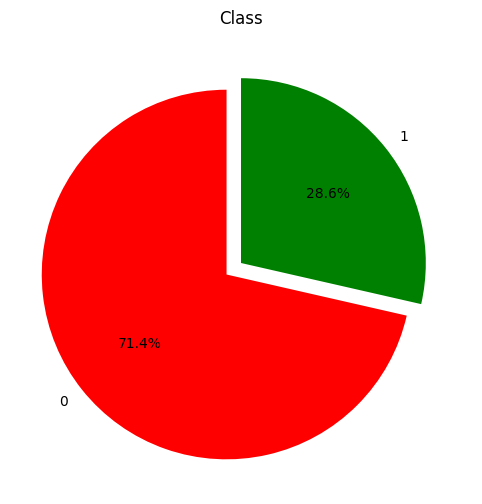

In [11]:
if 'Class' in balanced_df.columns:
    plt.figure(figsize=(8, 6))
    balanced_df['Class'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['red','green'], explode=(0.1, 0))
    plt.title('Class')
    plt.ylabel('')
    plt.show()

In [12]:
corr_matrix = balanced_df.corr()

# Get the correlation values with the "Class" column
class_corr = corr_matrix["Class"]

# Filter the columns with a correlation value >= 0.1
columns_with_high_corr = class_corr[class_corr >= 0.1].index.tolist()

# Display the result
print(columns_with_high_corr)

['V2', 'V4', 'V11', 'V19', 'V20', 'V21', 'V27', 'V28', 'Amount', 'Class']


In [13]:
df = balanced_df[columns_with_high_corr]
df.head()

,V2,V4,V11,V19,V20,V21,V27,V28,Amount,Class
0,1.407420,-0.542403,-1.344010,-0.098188,-0.152474,-0.214620,0.109350,0.011183,10.77,0
1,-0.411486,0.446260,1.035352,0.320952,-0.005610,0.037025,-0.051086,-0.047584,127.90,0
2,-1.772611,0.981178,-2.110448,0.733508,0.646598,0.059884,-0.033167,0.078565,374.00,0
3,2.236648,-0.592088,-0.837991,0.864847,0.719826,0.029289,0.273909,0.013564,3.05,0
4,-0.344245,-2.456217,-1.116982,1.113727,0.530536,-1.288145,0.066741,0.154193,0.22,0


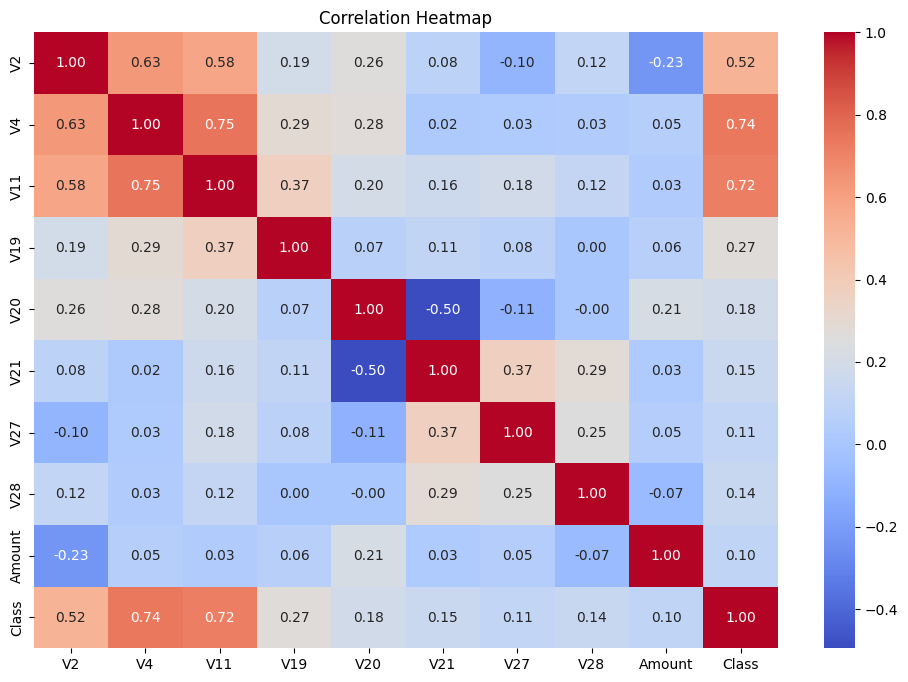

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [15]:
if 'Class' in df.columns:
    X = df.drop(['Class'], axis=1)
    y = df['Class']
else:
    raise ValueError("Target column 'Species' not found in the dataset.")

In [16]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)

In [17]:
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [18]:
dt_preds = dt_model.predict(X_test)
rf_preds = rf_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

In [19]:

def evaluate_model(y_test, preds, model_name):
    print(f"{model_name} Model")
    print(f"R^2 Score: {r2_score(y_test, preds)}")
    print("Classification Report:")
    print(classification_report(y_test, preds))
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, preds)
    print(cm)
    print("Accuracy Score:")
    print(accuracy_score(y_test, preds))
    print("\n")

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.title(f'{model_name} Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

Decision Tree Model
R^2 Score: 0.48002372907585567
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       283
           1       0.84      0.80      0.82       137

    accuracy                           0.89       420
   macro avg       0.87      0.86      0.87       420
weighted avg       0.88      0.89      0.89       420

Confusion Matrix:
[[262  21]
 [ 27 110]]
Accuracy Score:
0.8857142857142857




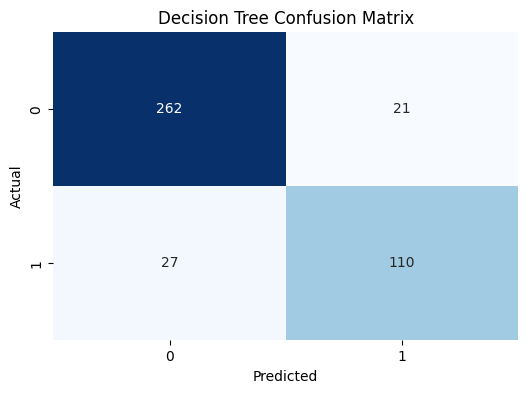

In [20]:

evaluate_model(y_test, dt_preds, "Decision Tree")

Random Forest Model
R^2 Score: 0.6641819916948235
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       283
           1       0.93      0.84      0.88       137

    accuracy                           0.93       420
   macro avg       0.93      0.90      0.91       420
weighted avg       0.93      0.93      0.93       420

Confusion Matrix:
[[274   9]
 [ 22 115]]
Accuracy Score:
0.9261904761904762




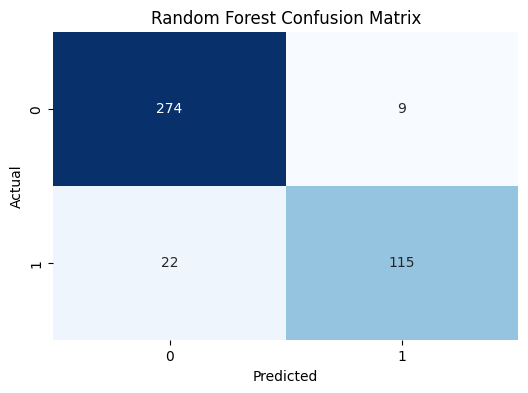

In [21]:

evaluate_model(y_test, rf_preds, "Random Forest")

XGBoost Model
R^2 Score: 0.6533491527172371
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       283
           1       0.91      0.85      0.88       137

    accuracy                           0.92       420
   macro avg       0.92      0.91      0.91       420
weighted avg       0.92      0.92      0.92       420

Confusion Matrix:
[[271  12]
 [ 20 117]]
Accuracy Score:
0.9238095238095239




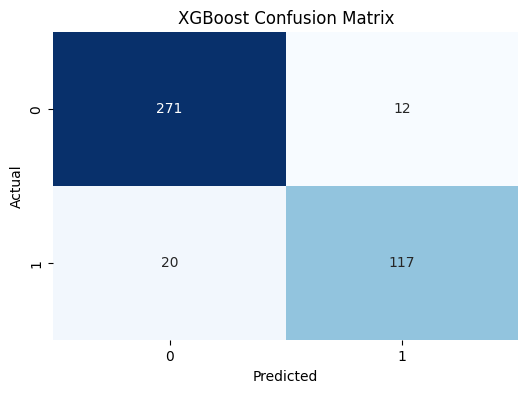

In [22]:

evaluate_model(y_test, xgb_preds, "XGBoost")

Accuracy: 0.945095
Precision: 0.02717825739408473
Recall: 0.9161676646706587
F1 Score: 0.052790477011989995


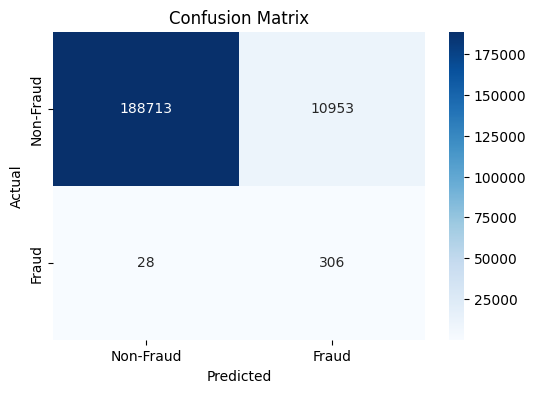

In [23]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



# Select the columns you used during training
columns_to_use = ['V2', 'V4', 'V11', 'V19', 'V20', 'V21', 'V27', 'V28', 'Amount', 'Class']

# Randomly sample 10,000 rows from the original dataset
sampled_df = data[columns_to_use].sample(n=200000, random_state=42)

# Split into features and target
X_test_new = sampled_df.drop('Class', axis=1)  # Features
y_test_new = sampled_df['Class']  # Target

# Assuming `model` is your trained model, use it to make predictions
y_pred = dt_model.predict(X_test_new)

# Evaluate the model's performance
accuracy = accuracy_score(y_test_new, y_pred)
precision = precision_score(y_test_new, y_pred)
recall = recall_score(y_test_new, y_pred)
f1 = f1_score(y_test_new, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
cm = confusion_matrix(y_test_new, y_pred)

# Plot the confusion matrix using seaborn heatmap for better visuals
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.98219
Precision: 0.0796875
Recall: 0.9161676646706587
F1 Score: 0.14662194537613799


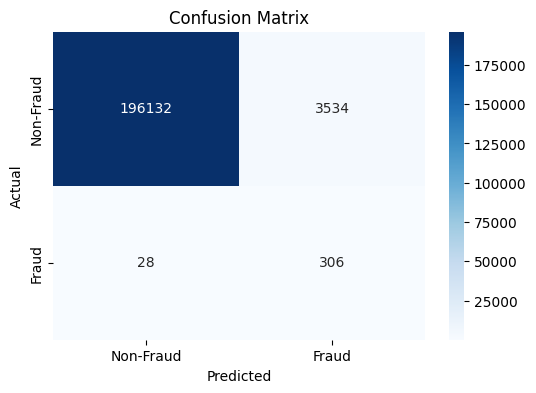

In [24]:
y_pred = rf_model.predict(X_test_new)

# Evaluate the model's performance
accuracy = accuracy_score(y_test_new, y_pred)
precision = precision_score(y_test_new, y_pred)
recall = recall_score(y_test_new, y_pred)
f1 = f1_score(y_test_new, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
cm = confusion_matrix(y_test_new, y_pred)

# Plot the confusion matrix using seaborn heatmap for better visuals
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.975775
Precision: 0.06024566192240203
Recall: 0.9251497005988024
F1 Score: 0.11312465678198792


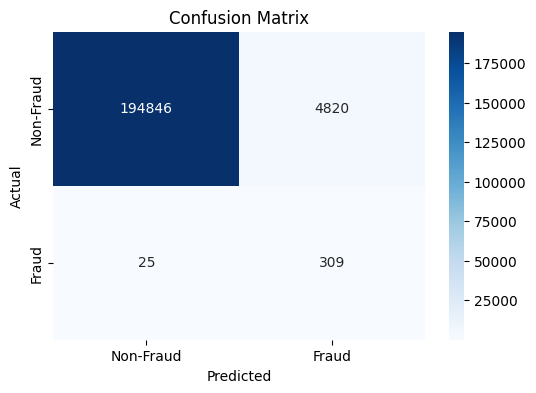

In [25]:
y_pred = xgb_model.predict(X_test_new)

# Evaluate the model's performance
accuracy = accuracy_score(y_test_new, y_pred)
precision = precision_score(y_test_new, y_pred)
recall = recall_score(y_test_new, y_pred)
f1 = f1_score(y_test_new, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
cm = confusion_matrix(y_test_new, y_pred)

# Plot the confusion matrix using seaborn heatmap for better visuals
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()